<a href="https://colab.research.google.com/github/davolu/Descision_Tree_Implementation_with_Scikit_Learn/blob/main/Descision_Tree_Implementation_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#sample dataset used can be downloaded from https://www.kaggle.com/uciml/pima-indians-diabetes-database
#inspired by https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Import  libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics


#get column names 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

#load the data set via panda
diabetes_pd = pd.read_csv("diabetes.csv", header=None, skiprows=1, names=col_names)
diabetes_pd.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#split dataset in features and target variable (usually the last column)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_pd[feature_cols] #Features
y = diabetes_pd.label # Target variable


In [24]:
# Separate our dataset into training and test 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 


In [25]:
#now let's build the descision tree using the DecisionTreeClassifier from sklearn

clfObj = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfObj = clfObj.fit(X_train,y_train)

#Predict the response from test dataset
y_pred = clfObj.predict(X_test)

In [30]:
# Model Accuracy, how correct is the classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


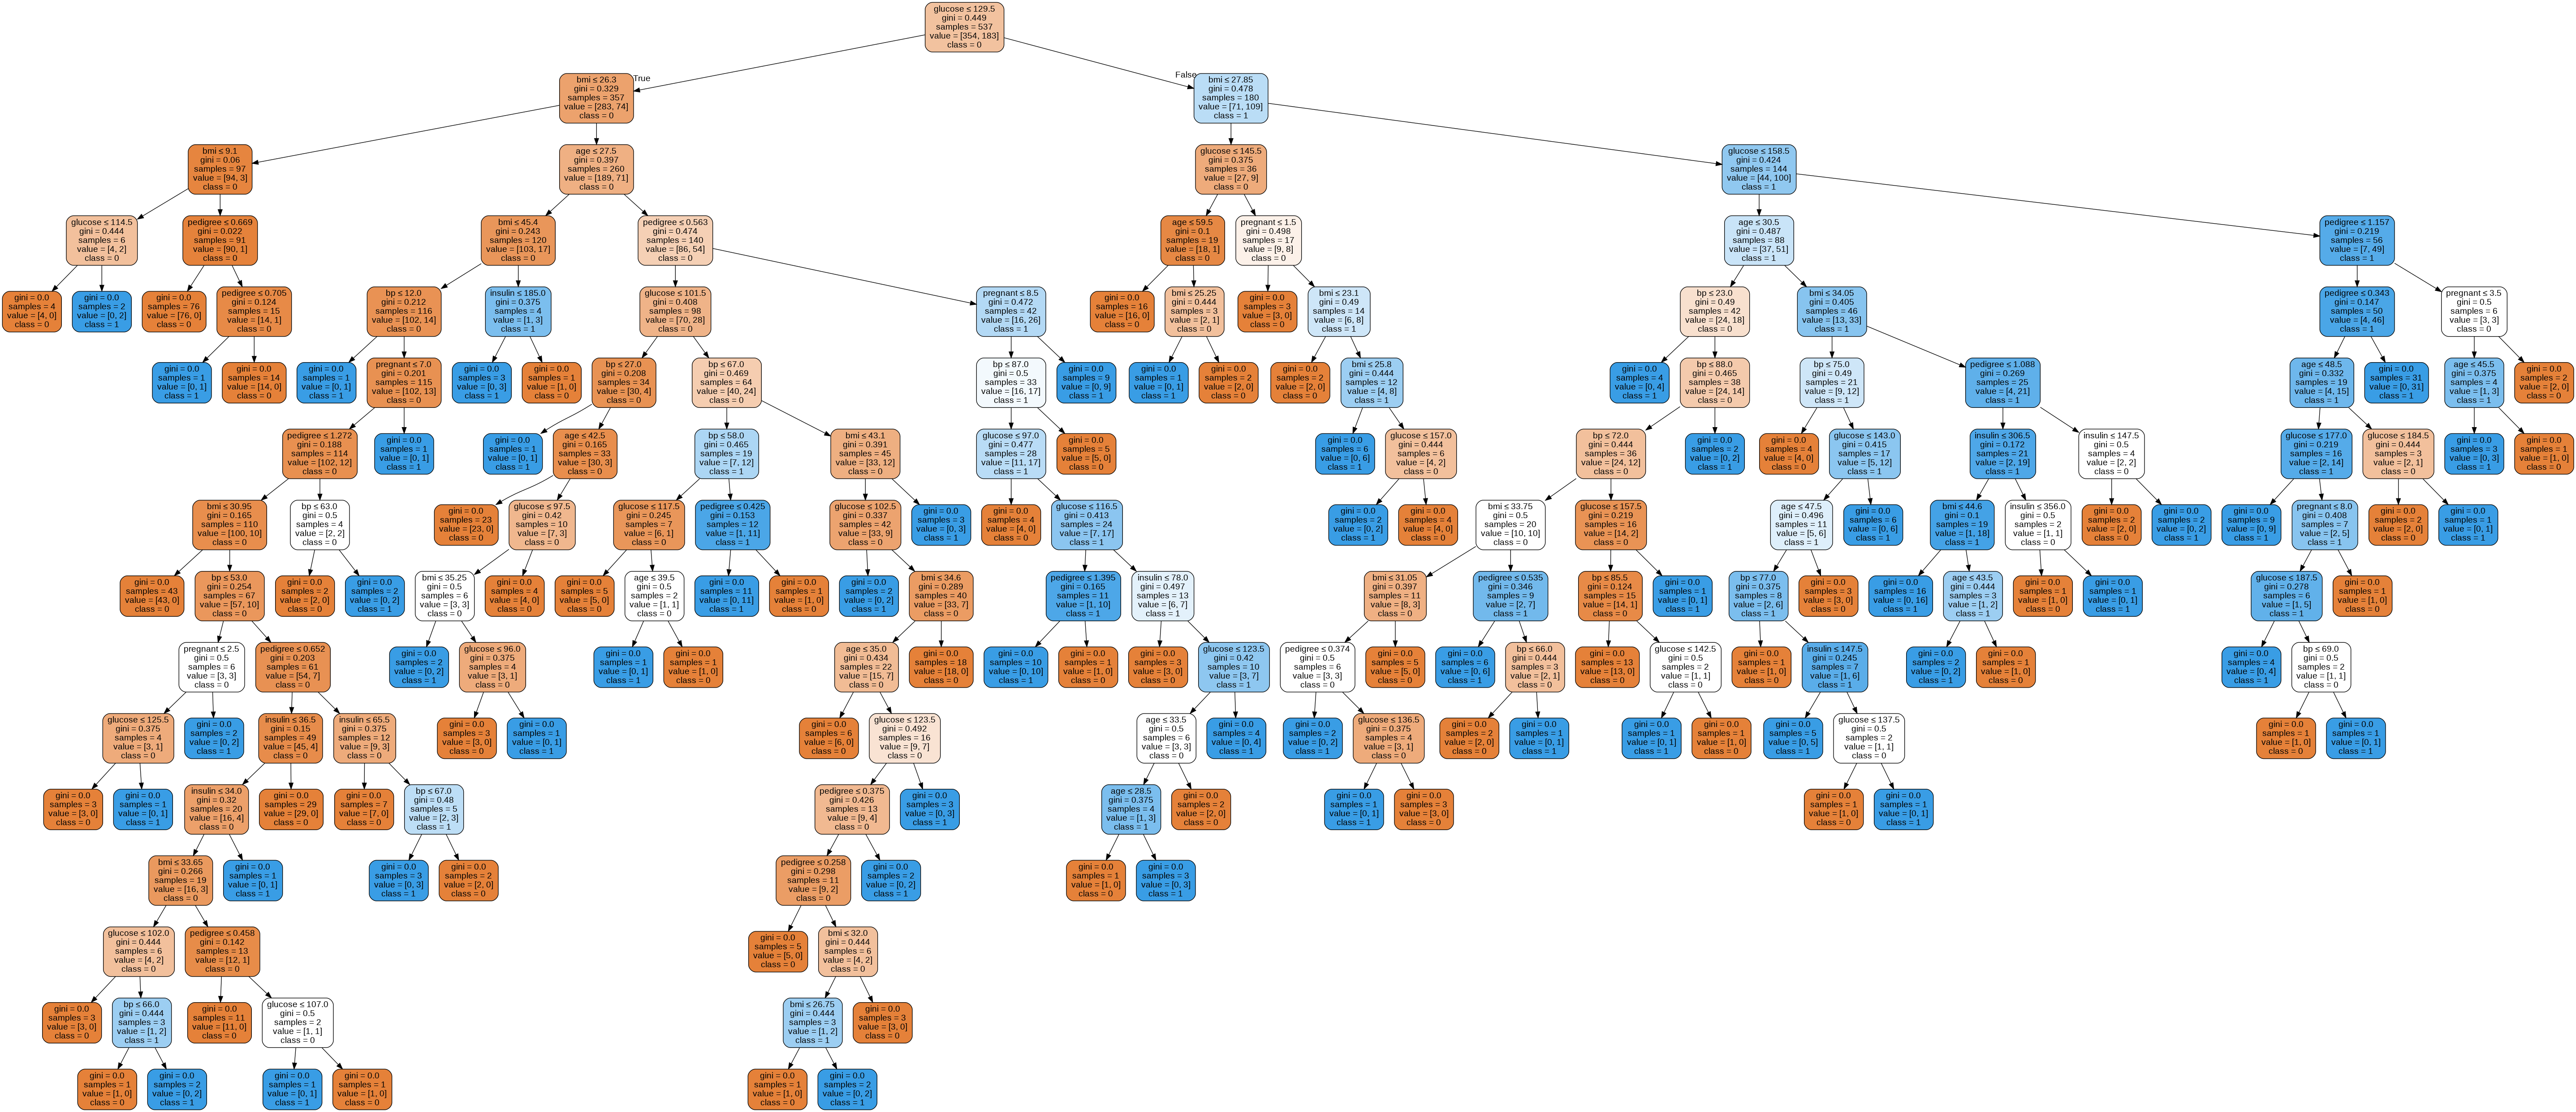

In [32]:
#optional
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clfObj, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())